<a href="https://colab.research.google.com/github/Venu2791/Deep-Vision/blob/master/Assignment_5/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing classes from keras for building CNN

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Plotting a sample image from train dataset

(60000, 28, 28)


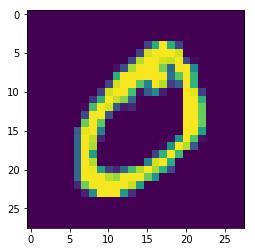

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Shape of channels in each layer**

1.  28X28X1      | 3X3X1X16             -> 26X26X16 </br>
2.  26X26X16     | 3X3X16X32            -> 24X24X32</br> 
3.  24X24X32     | 1X1X32X10            -> 24X24X10   </br>
4.  24X24X10   <---->maxpooling<---->   -> 12X12X10</br>
5.  12X12X10     | 3X3X10X16            -> 10X10X16</br>
6.  10X10X10     | 3X3X16X16            -> 8X8X16</br>
7.  8X8X16       | 3X3X16X16            -> 6X6X16</br>
8.  6X6X16       | 3X3X16X16            -> 4X4X16</br>
9.  4X4X16       | 4X4X16X10            -> 1X1X10</br>


In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_43 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_43 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_44 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 10)       

**Model.compile()**

**Loss Function:** A loss function is used to optimize the parameter values in a neural network model. Loss functions map a set of parameter values for the network onto a scalar value that indicates how well those parameter accomplish the task the network is intended to do.

**Optimizer:** This step selects an optimizer algorithm that manipulates the learning rate per time-step so as to update the weights in a manner that does not lead to a swinging behaviour around the minimum

**Learning Rate - Step Decay :**
High learning rate will lead to random to and fro moment of the vector around local minima while a slow learning rate results in getting stuck into false minima. Thus, knowing when to decay the learning rate can be hard to find out.We base our experiment on the principle of step decay. Here, we reduce the learning rate by a constant factor every  epochs. 

**Data Augumentation:**
Data augmentation is a technique to artificially create new training data from existing training data. This is done by applying domain-specific techniques to examples from the training data that create new and different training examples.
Transforms include a range of operations from the field of image manipulation, such as shifts, flips, zooms, and much more. This is considered to be a type of regularization, as we create variations in the training data it provides the generalization.

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
output= model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),validation_data=(X_test,Y_test),steps_per_epoch=200, epochs=40,callbacks=[LearningRateScheduler(scheduler, verbose=1)])
#ouput=model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
200/200 [==============================] - 8s 38ms/step - loss: 0.8677 - acc: 0.7592 - val_loss: 0.2057 - val_acc: 0.9604
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
200/200 [==============================] - 3s 16ms/step - loss: 0.4453 - acc: 0.8720 - val_loss: 0.1388 - val_acc: 0.9728
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
200/200 [==============================] - 3s 16ms/step - loss: 0.3640 - acc: 0.8890 - val_loss: 0.1075 - val_acc: 0.9825
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
200/200 [==============================] - 3s 16ms/step - loss: 0.3218 - acc: 0.9003 - val_loss: 0.0919 - val_acc: 0.9834
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
200/200 [==============================] - 3s 17ms/step - loss: 0.2953 - acc: 0.9077 - va

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.025855406473763286, 0.9933]


**Problem Statement**

Change Code from Assignment 4 to include:

*   Image normalization
*   L2 regularization
*   ReLU after BN

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(16, 3, 3))#9
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#7
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3))#3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Convolution2D(10, 4, 4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_50 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_51 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_23 (Activation)   (None, 24, 24, 32)       

***Input Image Normalization:***

Standardize and Normalize the image using the featurewise_center (standardization) and featurewise_std_normalization (Normalization using mean and variance).
Standardization is different from Normalization, the former refers to scaling the pixels(diving it by 255).


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

***L2 Regularization:***

Regularization is a key component in preventing overfitting. Also, some techniques of regularization can be used to reduce model parameters while maintaining accuracy, for example, to drive some of the parameters to zero. This might be desirable for reducing the model size or driving down the cost of evaluation in a mobile environment where processor power is constrained.

In the below step we have introduced the custom loss function for L2 Implementation. Here, we have added the loss to the total model rather than applying ffor each layer.


In [0]:
import keras.backend as K

def custom_loss(lambd, model, batch_size):
  
  def loss(y_true, y_pred):
    reg_loss = 0.0;
    for layer in model.layers:
      if "Conv" in str(layer):
        reg_loss += K.sum(K.square(layer.weights[0]))
    l2_loss = (lambd/(2*batch_size))*reg_loss
    return K.categorical_crossentropy(y_true,y_pred) + l2_loss
  return loss


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler,ModelCheckpoint

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
model.compile(loss=custom_loss(0.1, model, 512), optimizer=Adam(lr=0.003), metrics=['accuracy'])
bestval = ModelCheckpoint('bestmodel.hdf5', save_best_only=True, monitor='val_acc', mode='max')

In [0]:
outputl2 = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),validation_data=(X_test,Y_test),steps_per_epoch=200, epochs=40,callbacks=[bestval,LearningRateScheduler(scheduler, verbose=1)])
#model.fit(X_train, Y_train,  batch_size=512, validation_data=(X_test,Y_test),epochs=15, verbose=1,callbacks=[lr_rate])

Epoch 1/40


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
200/200 [==============================] - 9s 44ms/step - loss: 1.0024 - acc: 0.7334 - val_loss: 0.4206 - val_acc: 0.9141
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
200/200 [==============================] - 3s 17ms/step - loss: 0.5297 - acc: 0.8609 - val_loss: 0.2216 - val_acc: 0.9723
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
200/200 [==============================] - 4s 18ms/step - loss: 0.4647 - acc: 0.8657 - val_loss: 0.1849 - val_acc: 0.9679
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
200/200 [==============================] - 4s 18ms/step - loss: 0.4247 - acc: 0.8722 - val_loss: 0.1645 - val_acc: 0.9779
Epoch 5/40

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
200/200 [==============================] - 3s 17ms/step - loss: 0.4010 - acc: 0.8751 - val_loss: 0.1

In [0]:
prediction=model.predict(X_test)

***Misclassified Images:***

We have taken top 25 misclassified images and made an image gallery out of it. 

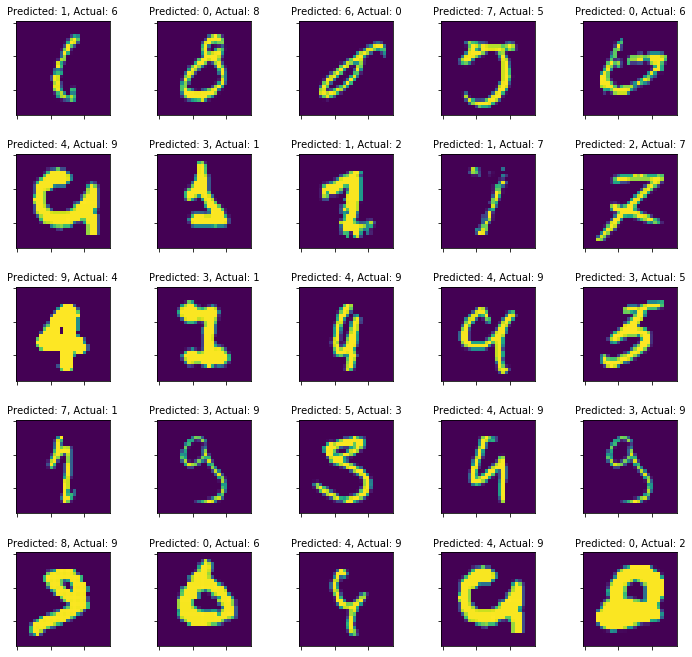

In [0]:
misclassified_idx = []

for i in range(len(Y_test)):
  if np.argmax(Y_test[i])!= np.argmax(prediction[i]):
    misclassified_idx.append(i)

plt_idx = np.random.choice(misclassified_idx, 25)
fig, ax = plt.subplots(5,5,figsize = (10,10))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.92, wspace=None, hspace=None)
k = 0
for i in range(5):
  for j in range(5):
    img = X_test[plt_idx[k]].reshape(28,28)
    pred = np.argmax(prediction[plt_idx[k]])
    actual = np.argmax(Y_test[plt_idx[k]])
    ax[i,j].set_xticklabels([])
    ax[i,j].set_yticklabels([])
    ax[i,j].imshow(img)
    ax[i,j].set_title("Predicted: " + format(pred) + ", Actual: " + format(actual), fontsize=10)
    k += 1

***Summary:***

So far we have learnt multiple regularization techniques : Batch norm, L2 Regularization, Data augumentation, Learning Rate, Drop-Out. 

*Note:* When using multiple regularization techiniques it will have cummulative effect in the model. So it is important to use these iteratively and assess the performance at each step.
